In [1]:
import random
import numpy as np
import os
from matplotlib import pyplot as plt

In [2]:
os.chdir('..')

In [3]:
from src.standard_ga.simulation import GA
from src.common.fitness import griewank

In [4]:
ga = GA(fitness_fn=griewank, mutation_scale=.2)
solution, history = ga.run(100, population_size=200, seed=1)

In [5]:
history

,best_fitness,avg_fitness,epoch,ncalls,seed
0,31.576774,150.673448,0,200,1
1,12.211542,74.373628,1,520,1
2,3.148439,28.974740,2,840,1
3,2.250768,10.565242,3,1160,1
4,1.956782,3.975143,4,1480,1
...,...,...,...,...,...
95,0.580012,0.790824,95,30600,1
96,0.580012,0.804921,96,30920,1
97,0.580012,0.754910,97,31240,1
98,0.580012,0.784962,98,31560,1


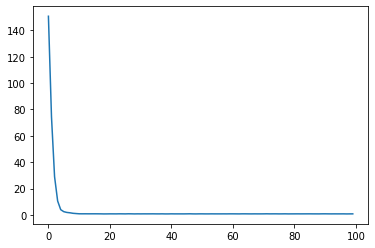

In [8]:
plt.plot(history.avg_fitness)